#### Imports and read

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
0,0,57,616,2,1,3,-153263.200759,0.23,42658.02
1,1,45,591,1,1,1,161474.307306,0.24,248327.61
2,2,59,613,1,1,1,14209.331170,0.09,24371.94
3,3,62,656,1,1,1,-77270.897162,0.17,48788.04
4,4,45,567,2,1,5,282353.182490,0.22,47808.66


In [4]:
del data[data.columns[0]]

In [5]:
data.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
0,57,616,2,1,3,-153263.200759,0.23,42658.02
1,45,591,1,1,1,161474.307306,0.24,248327.61
2,59,613,1,1,1,14209.331170,0.09,24371.94
3,62,656,1,1,1,-77270.897162,0.17,48788.04
4,45,567,2,1,5,282353.182490,0.22,47808.66


#### Calculate the New Accumulated Capital

In [6]:
additional_savings = 0.5 * 10000

In [7]:
data['new_accumulated_capital'] = data['accumulated_capital'] + additional_savings

In [8]:
data.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,new_accumulated_capital
0,57,616,2,1,3,-153263.200759,0.23,42658.02,-148263.200759
1,45,591,1,1,1,161474.307306,0.24,248327.61,166474.307306
2,59,613,1,1,1,14209.331170,0.09,24371.94,19209.331170
3,62,656,1,1,1,-77270.897162,0.17,48788.04,-72270.897162
4,45,567,2,1,5,282353.182490,0.22,47808.66,287353.182490


#### Adjust Income for Inflation

In [9]:
current_year = datetime.datetime.now().year
current_year

2023

In [10]:
inflation_rate = round(4.4 / 100,4)
inflation_rate 

0.044

In [11]:
data['adjusted_income'] = data['income'].copy()

for year in range(2020, current_year + 1):
    data['adjusted_income'] = data['adjusted_income'] * (1 + inflation_rate)

In [12]:
data.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,new_accumulated_capital,adjusted_income
0,57,616,2,1,3,-153263.200759,0.23,42658.02,-148263.200759,50676.042090
1,45,591,1,1,1,161474.307306,0.24,248327.61,166474.307306,295003.387790
2,59,613,1,1,1,14209.331170,0.09,24371.94,19209.331170,28952.901641
3,62,656,1,1,1,-77270.897162,0.17,48788.04,-72270.897162,57958.263616
4,45,567,2,1,5,282353.182490,0.22,47808.66,287353.182490,56794.798878


#### Calculate Retirement Readiness Rating

In [13]:
len(data)

47626

In [14]:
retirement_ready_count = data[data['new_accumulated_capital'] >= 0].shape[0]
retirement_ready_count #count of individuals who were able to afford their retirement

28669

In [15]:
retirement_readiness_rating = retirement_ready_count / data.shape[0]
retirement_readiness_rating #ratio of individuals who were able to afford their retirement to the total number of individuals

0.6019611136774031

#### Calculate Weighted Average Retirement Savings Shortfall

In [16]:
age_cohorts = [35, 39, 40, 44, 45, 49, 50, 54, 55, 59, 60, 64]
race_labels = {1:'White', 2:'Black', 3:'Hispanic', 4:'Other'}

In [17]:
data['retirement_savings_shortfall'] = data.apply(lambda row: row['accumulated_capital'] if row['accumulated_capital'] < 0 else 0, axis=1)

In [18]:
# def calculate_retirement_savings_shortfall(row):
#     if row['accumulated_capital'] < 0:
#         return row['accumulated_capital']
#     return 0

In [19]:
# # Indicates how far a person is behind the amount needed to guarantee a comfortable retirement
# data['retirement_savings_shortfall'] = data.apply(calculate_retirement_savings_shortfall, axis=1) 

In [20]:
data.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,new_accumulated_capital,adjusted_income,retirement_savings_shortfall
0,57,616,2,1,3,-153263.200759,0.23,42658.02,-148263.200759,50676.042090,-153263.200759
1,45,591,1,1,1,161474.307306,0.24,248327.61,166474.307306,295003.387790,0.000000
2,59,613,1,1,1,14209.331170,0.09,24371.94,19209.331170,28952.901641,0.000000
3,62,656,1,1,1,-77270.897162,0.17,48788.04,-72270.897162,57958.263616,-77270.897162
4,45,567,2,1,5,282353.182490,0.22,47808.66,287353.182490,56794.798878,0.000000


In [21]:
def calculate_weighted_average_shortfall(data, age_cohorts, race_labels):
    weighted_sum = 0
    total_weight = 0
    
    for i in range(len(age_cohorts) - 1):
        for race in race_labels:
            cohort_data = data[(data['initial_age'] >= age_cohorts[i]) & (data['initial_age'] < age_cohorts[i+1]) & (data['race'] == race)]
            weighted_sum += (cohort_data['retirement_savings_shortfall'] * cohort_data['weight']).sum()
            total_weight += cohort_data['weight'].sum()
    
    if total_weight != 0:
        return weighted_sum / total_weight
    else:
        return 0.0  # Return 0 if total_weight is zero

In [22]:
average_shortfall = calculate_weighted_average_shortfall(data, age_cohorts, race_labels)

In [23]:
average_shortfall

-50362.09916687705

##### A negative value for average_shortfall suggests that, on average, individuals have accumulated more savings than what is needed for a comfortable retirement. However, it's important to interpret this value in the context of the specific calculations and assumptions made in the code.

#### Plot 1: Weighted Average Retirement Savings Shortfall by Race and Age Cohort

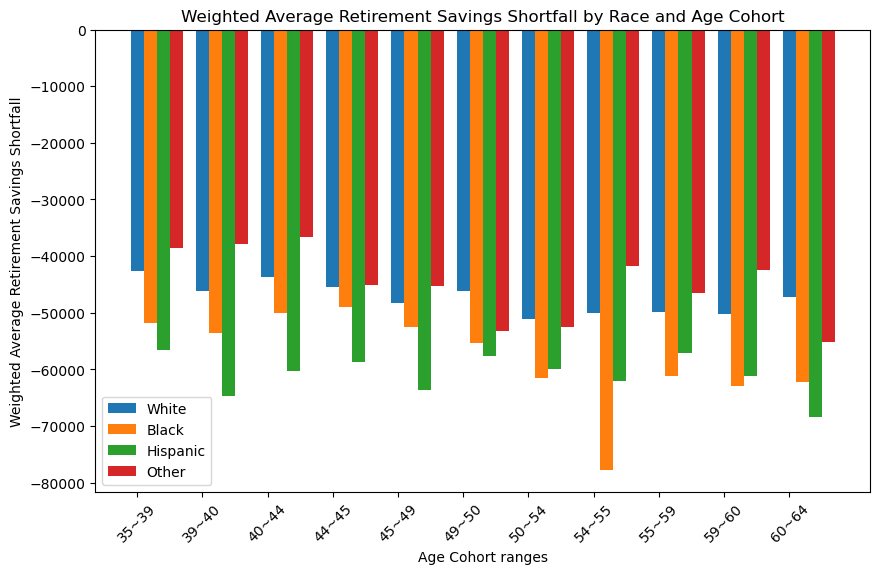

In [24]:
race_labels_list = list(race_labels.values())
shortfall_by_cohort_race = np.zeros((len(age_cohorts) - 1, len(race_labels_list)))
for i in range(len(age_cohorts) - 1):
    for j, race in race_labels.items():
        cohort_data = data[(data['initial_age'] >= age_cohorts[i]) & (data['initial_age'] < age_cohorts[i+1]) & (data['race'] == j)]
        weighted_shortfall = (cohort_data['retirement_savings_shortfall'] * cohort_data['weight']).sum()
        total_weight = cohort_data['weight'].sum()
        average_shortfall = weighted_shortfall / total_weight if total_weight != 0 else 0.0
        shortfall_by_cohort_race[i, j-1] = average_shortfall

fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
x = np.arange(len(age_cohorts) - 1)
width = 0.2
age_cohort_labels = [f'{age_cohorts[i]}~{age_cohorts[i+1]}' for i in range(len(age_cohorts) - 1)]
for i in range(len(race_labels_list)):
    ax.bar(x + (i * width), shortfall_by_cohort_race[:, i], width, label=race_labels_list[i])
ax.set_xticks(x)
ax.set_xticklabels(age_cohort_labels, rotation=45)
ax.set_xlabel('Age Cohort ranges')
ax.set_ylabel('Weighted Average Retirement Savings Shortfall')
ax.set_title('Weighted Average Retirement Savings Shortfall by Race and Age Cohort')
ax.legend(loc='lower left')
plt.show()


#### Plot 2: Impact in Percentage Points of the New Scenario into the Retirement Readiness Rating per Age Cohort

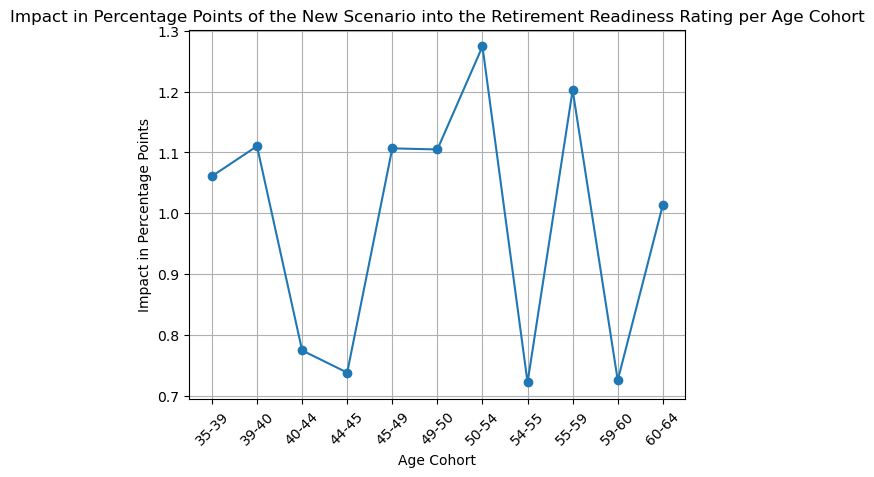

In [25]:
impact_percentage = []
for i in range(len(age_cohorts) - 1):
    cohort_data = data[(data['initial_age'] >= age_cohorts[i]) & (data['initial_age'] < age_cohorts[i+1])]
    old_retirement_ready_count = cohort_data[cohort_data['accumulated_capital'] >= 0].shape[0]
    new_retirement_ready_count = cohort_data[cohort_data['new_accumulated_capital'] >= 0].shape[0]
    impact = (new_retirement_ready_count - old_retirement_ready_count) / cohort_data.shape[0] * 100
    impact_percentage.append(impact)

age_cohort_labels = [f'{age_cohorts[i]}-{age_cohorts[i+1]}' for i in range(len(age_cohorts) - 1)]

plt.plot(age_cohort_labels, impact_percentage, marker='o')
plt.xlabel('Age Cohort')
plt.ylabel('Impact in Percentage Points')
plt.title('Impact in Percentage Points of the New Scenario into the Retirement Readiness Rating per Age Cohort')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [26]:
data.to_csv('new_data.csv')